## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [12]:
df = pd.read_csv("../cleaned_data/winequality-white_fixed.csv", index_col=0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Checking Data

In [11]:
# Check to make sure that no columns have perfect colinearity

corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

ValueError: zero-size array to reduction operation fmin which has no identity

## Scaling Data

In [18]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,0.750,0.428571,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.750,0.285714,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.750,0.285714,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.875,0.571429,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.875,0.571429,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.375,0.142857,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.286875
513,0.125,0.285714,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.573586
514,0.750,0.285714,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.357102
515,0.000,0.285714,0.636364,0.833333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


## Breaking Data in X and y

In [19]:
X = df.iloc[:,:-1]

In [20]:
y = df.iloc[:,-1]

# Generating Models

In [21]:
# Imports to build layered neural nets
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 10

# Defining batch size
bs = 1000

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [23]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [24]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.1149
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 0.1138
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1127
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 0.1115
Epoch 5/10
1/1 [==============================] - 0s 36ms/step - loss: 0.1104
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 0.1093
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1082
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 0.1072
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.1061
Epoch 10/10
1/1 [==============================] - 0s 23ms/step - loss: 0.1050
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.4115
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 0.4095
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - los


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:36:17   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


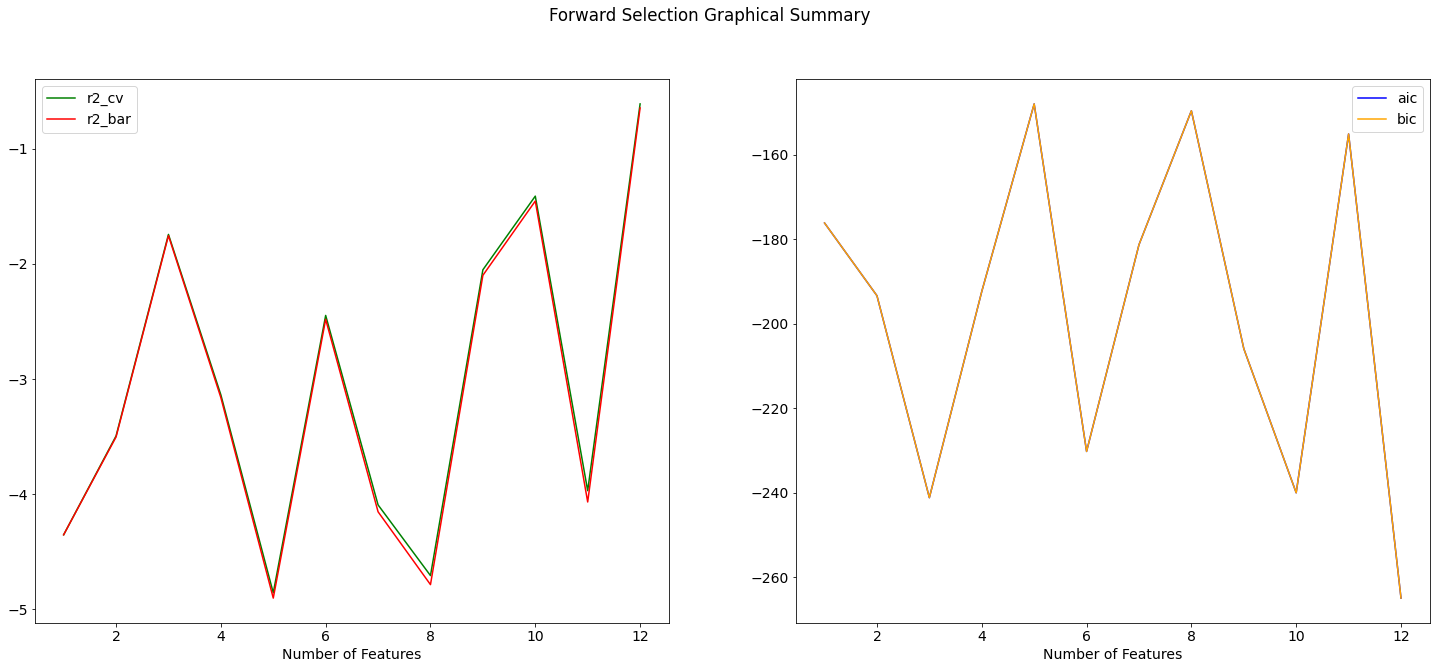

In [25]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [26]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [27]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.1076
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 0.1016
Epoch 3/10
1/1 [==============================] - 0s 26ms/step - loss: 0.0961
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0912
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0869
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0831
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.0798
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0771
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0748
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0729
Epoch 1/10
1/1 [==============================] - 1s 609ms/step - loss: 0.0645
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0619
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - 


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:38:18   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


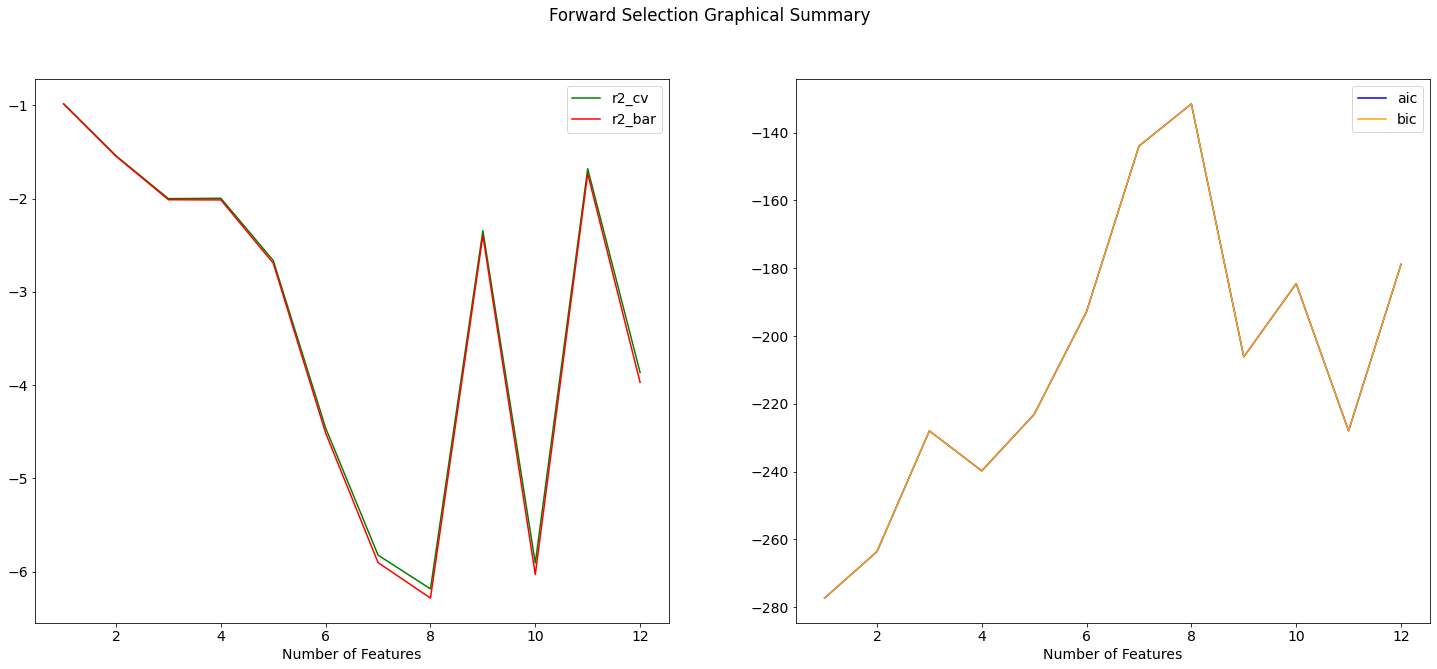

In [28]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [29]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [30]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 0s 479ms/step - loss: 0.0636
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0636
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0636
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0636
Epoch 6/10
1/1 [==============================] - 0s 79ms/step - loss: 0.0636
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0636
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0636
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0636
Epoch 1/10
1/1 [==============================] - 0s 497ms/step - loss: 0.0614
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0608
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - lo


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:40:18   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


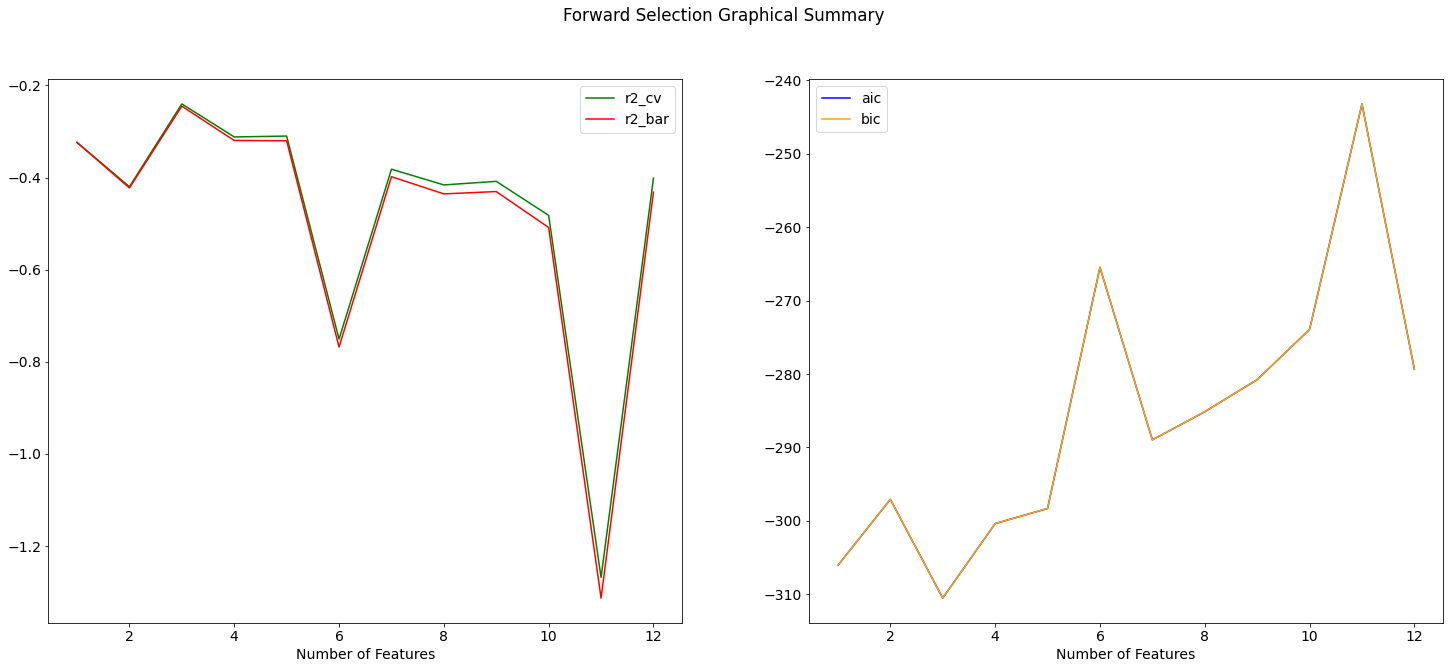

In [31]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [32]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [33]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 543ms/step - loss: 0.0733
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0723
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0713
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 0.0704
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 0.0694
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0685
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.0676
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0667
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0650
Epoch 1/10
1/1 [==============================] - 1s 615ms/step - loss: 0.1695
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1678
Epoch 3/10
1/1 [==============================] - 0s 15ms/step -


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:41:26   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


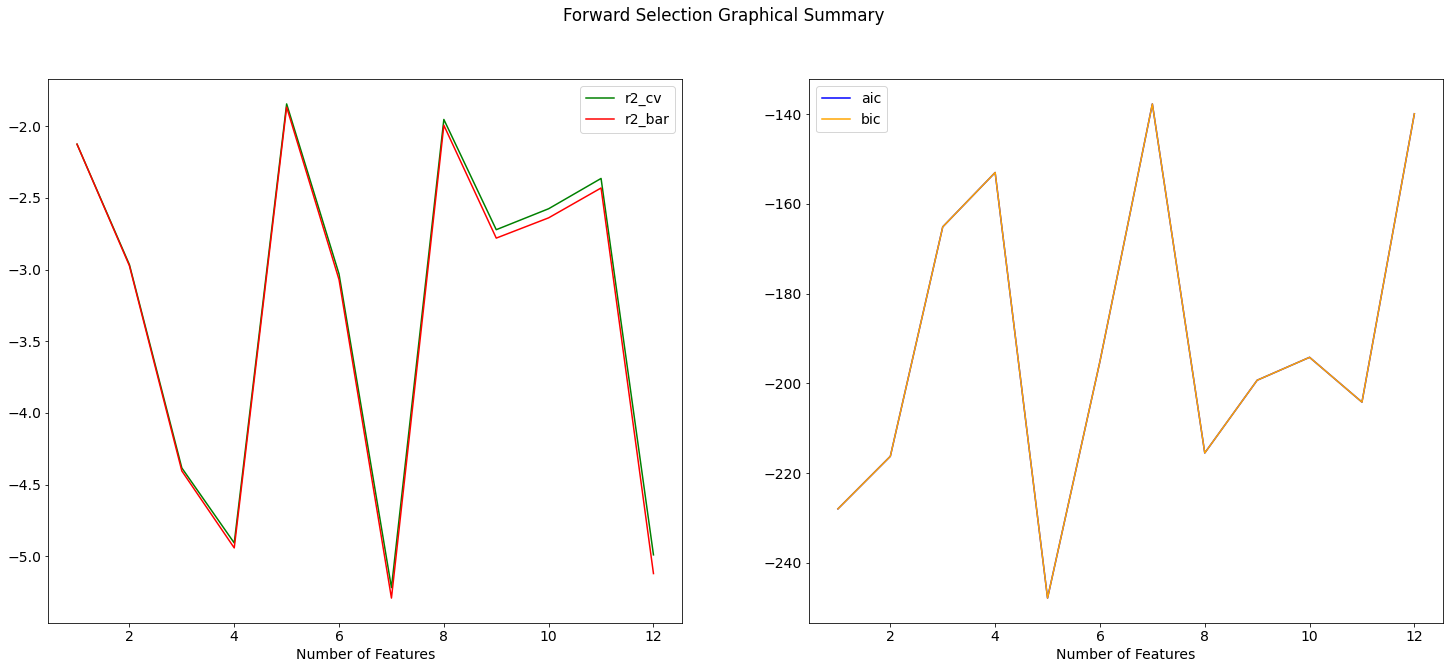

In [34]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [35]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [36]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 505ms/step - loss: 0.2195
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1864
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1591
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.1380
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.1228
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1128
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.1070
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1038
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.1022
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.1010
Epoch 1/10
1/1 [==============================] - 1s 503ms/step - loss: 0.7109
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6770
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:42:39   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


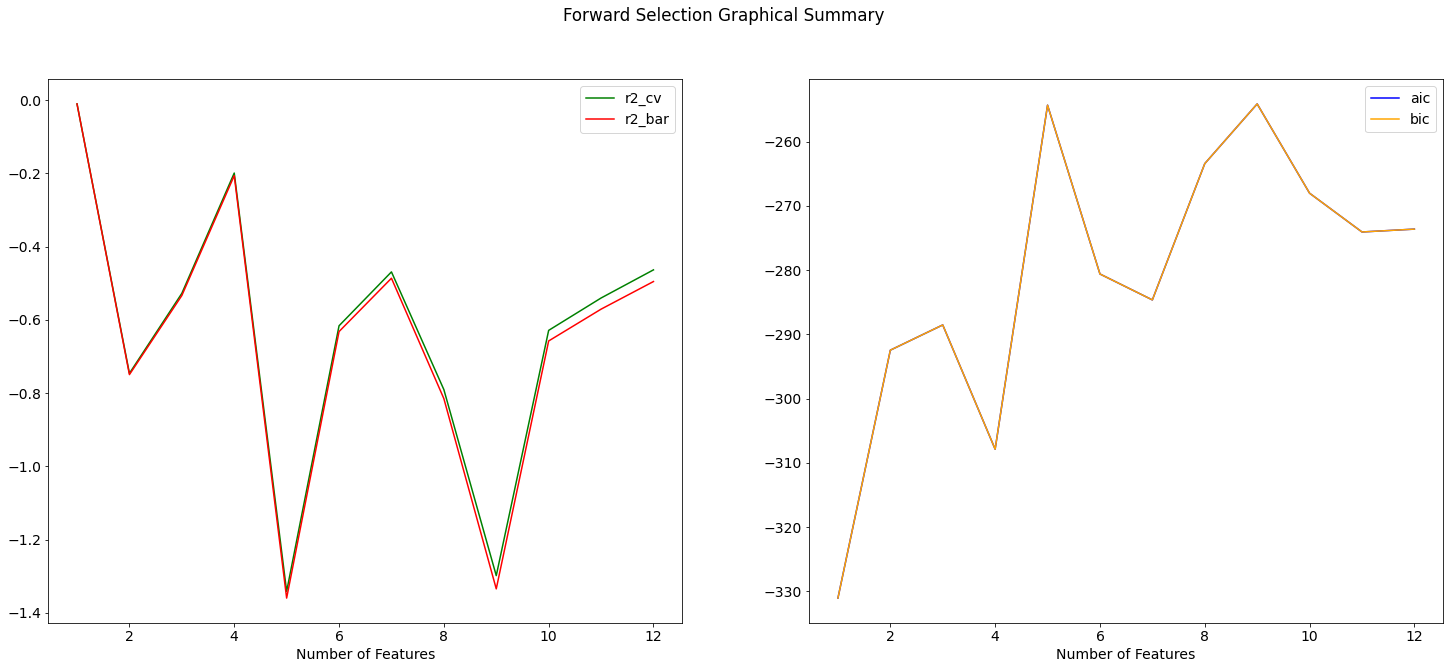

In [37]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [38]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [39]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 518ms/step - loss: 0.0636
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0636
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0636
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0636
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0636
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0636
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0636
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0636
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0636
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0636
Epoch 1/10
1/1 [==============================] - 1s 508ms/step - loss: 0.0647
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0645
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - l


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:43:53   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


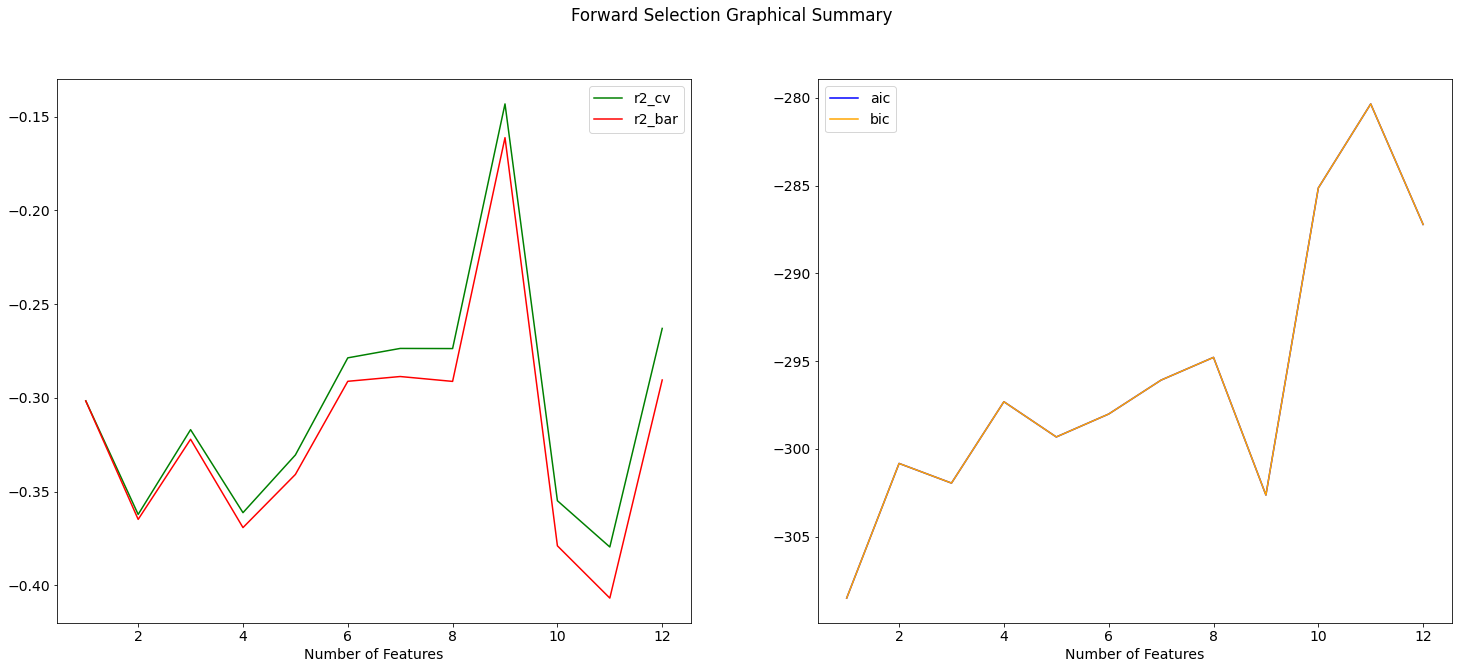

In [40]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 5 Layer Neural Networks

### Sigmoid Activation Function

In [41]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [42]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 616ms/step - loss: 0.4582
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 0.4502
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 0.4423
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 0.4348
Epoch 5/10
1/1 [==============================] - 0s 46ms/step - loss: 0.4279
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 0.4217
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4161
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4112
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4067
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4026
Epoch 1/10
1/1 [==============================] - 1s 633ms/step - loss: 0.1630
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 0.1604
Epoch 3/10
1/1 [==============================] - 0s 33ms/step 


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:45:07   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


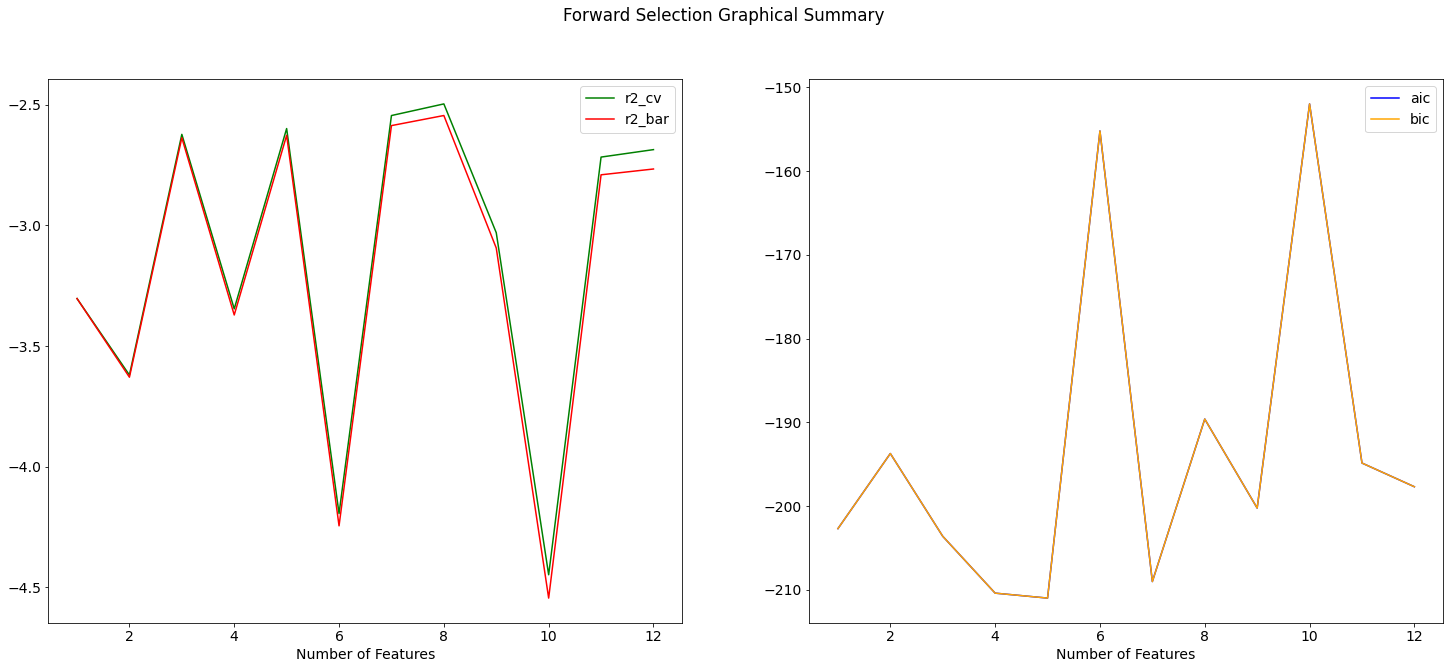

In [43]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [44]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [45]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 619ms/step - loss: 0.0937
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 0.5058
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 0.1240
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6575
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.4113
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0671
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2282
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2972
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2641
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1675
Epoch 1/10
1/1 [==============================] - 1s 610ms/step - loss: 0.0453
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3354
Epoch 3/10
1/1 [==============================] - 0s 20ms/step 


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:46:35   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


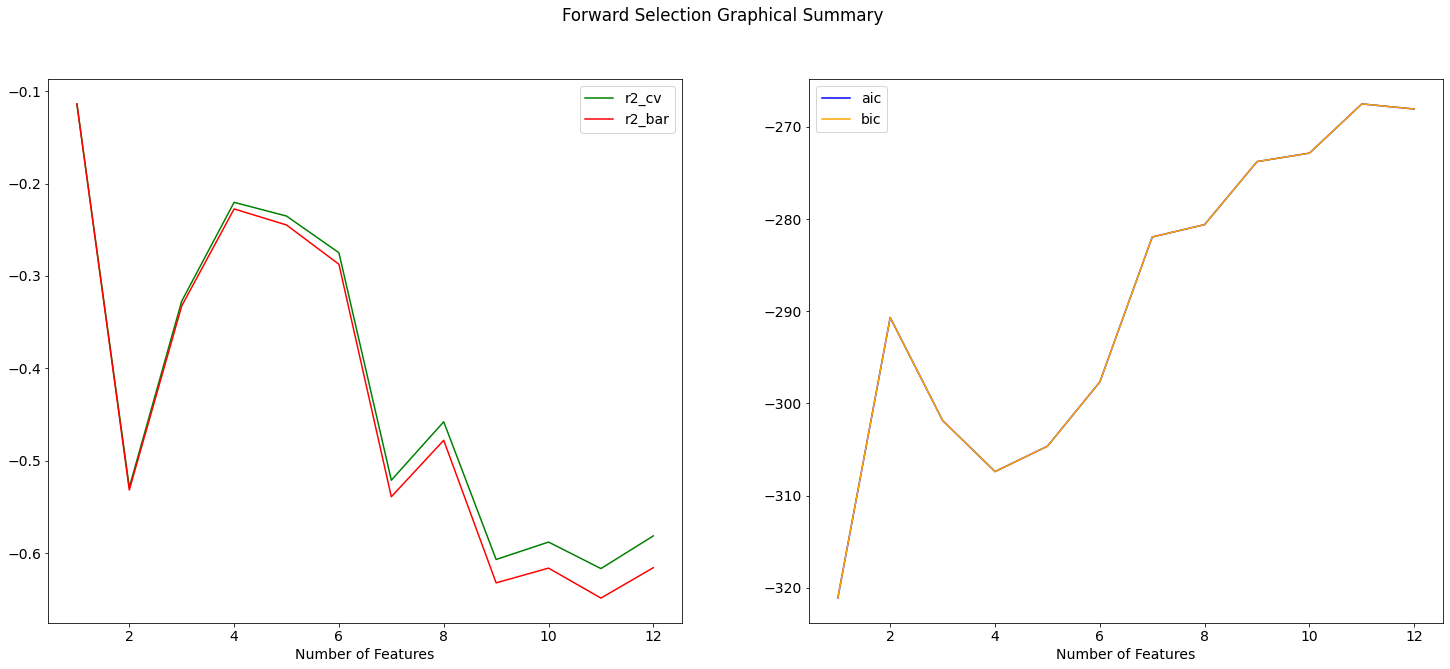

In [46]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [47]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [48]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0618
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 0.0507
Epoch 3/10
1/1 [==============================] - 0s 126ms/step - loss: 0.0436
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0393
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0383
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0399
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0413
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0413
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0390
Epoch 1/10
1/1 [==============================] - 1s 657ms/step - loss: 0.0462
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0395
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - l


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:48:02   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


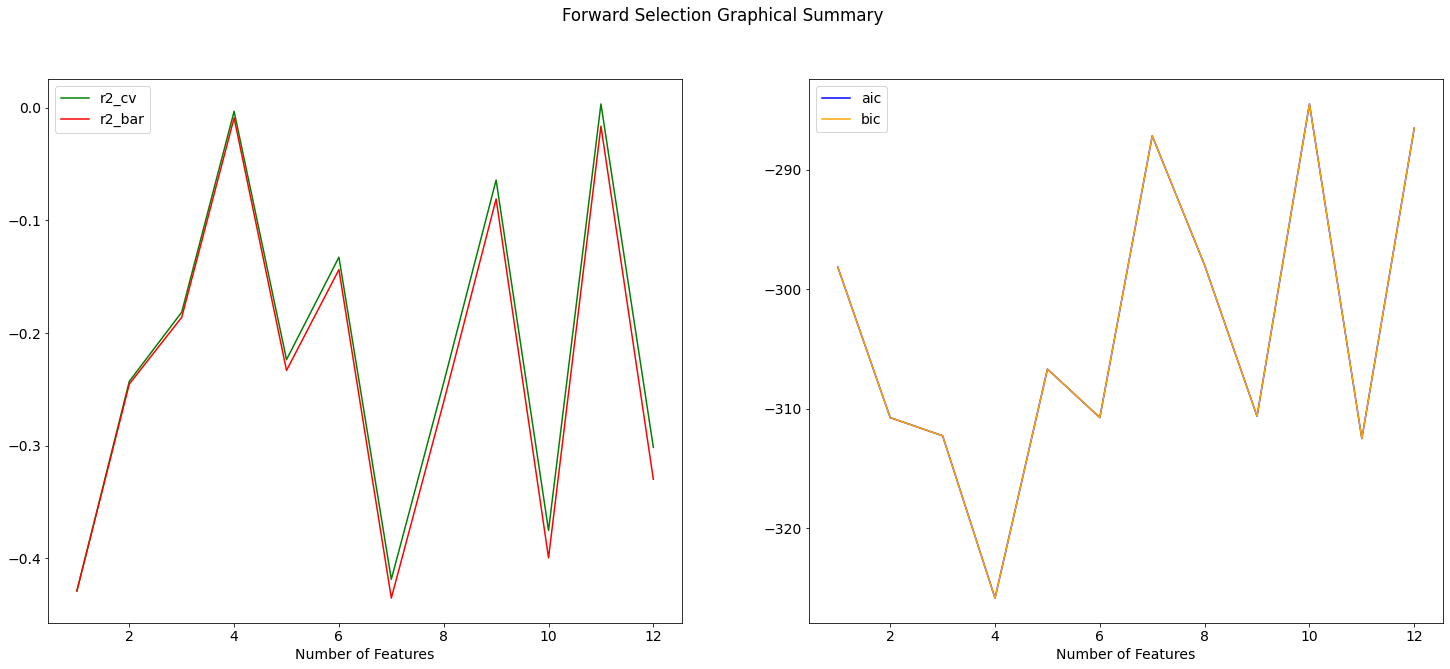

In [49]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)